In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ColabNotebooks/'

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks


In [2]:
!ls

 1.jpg				    Lec1_Tuto1_datasets
 1_.jpg				    Lec2_datasets
 bong.jpg			    Lec2-Lab1.ipynb
 book_align.jpg			    Lec2-Lab2.ipynb
 book_reference.jpg		    Lec2-Lab3.ipynb
 colab.npy			   'Numpy KhanhBlog.ipynb'
 colab.txt			    OpenCV_library.ipynb
 dog.jpg			    Pytorch_tensor_image_processing
 hust.png			    result.jpg
'Lec1_Basic operations.ipynb'	    siuuu.mp4
 Lec1_Lab01_pytorch_tensors.ipynb  'Tuần 1+2.ipynb'
 Lec1_Lab1.ipynb		   'Tuần 3+4.ipynb'
 Lec1_Lab2.ipynb		    Untitled


### Import libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [4]:
plt.figure(figsize=(10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

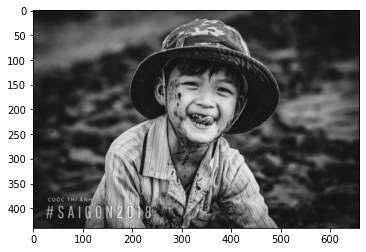

In [5]:
img=cv2.imread('1.jpg',0)
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(440, 660)

### Histogram calculation

Using cv2.calcHist from OpenCV

In [7]:
hist = cv2.calcHist(
    [img],
    channels = [0],
    mask = None,
    histSize = [256],
    ranges = [0,256]
)

In [8]:
hist.shape

(256, 1)

In [9]:
sum(hist)

array([290400.], dtype=float32)

In [10]:
img.shape[0] * img.shape[1]

290400

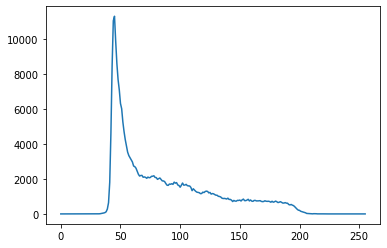

In [11]:
plt.plot(hist)

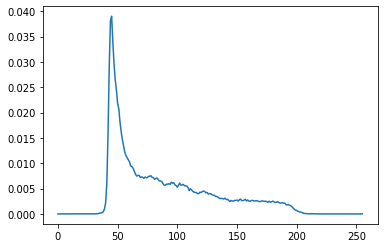

In [12]:
# Normalized histogram
h, w = img.shape[:2]
normalized_hist = hist/(h*w)
plt.plot(normalized_hist)

In [13]:
def plot_img_and_hist(img):
    '''Draw image together with its histogram and cdf'''
    hist = cv2.calcHist(
                    [img],
                    channels=[0],
                    mask=None, #full image
                    histSize=[256], #full scale
                    ranges=[0,256]
    )
    h, w = img.shape[:2]
    normalized_hist = hist/(h*w)
    cdf = normalized_hist.cumsum()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.plot(normalized_hist, 'b')
    # plt.plot(cdf, 'r--')
    # plt.legend(('histogram', 'cdf'), loc='upper left')
    # plt.plot(cdf, 'r--')
    # plt.legend(('histogram'), loc='upper left')
    # plt.legend('histogram', loc='upper left')
    

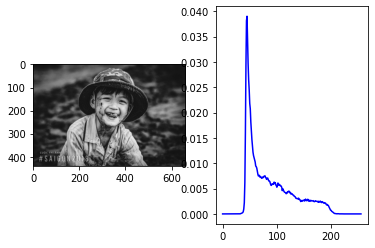

In [15]:
plot_img_and_hist(cv2.imread("1.jpg", 0))

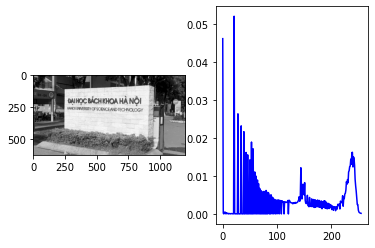

In [16]:
plot_img_and_hist(cv2.imread("hust.png", 0))

In [17]:
#reference: https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_image_gamma_lookuptable(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    table = np.array([((i / 255.0) ** gamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

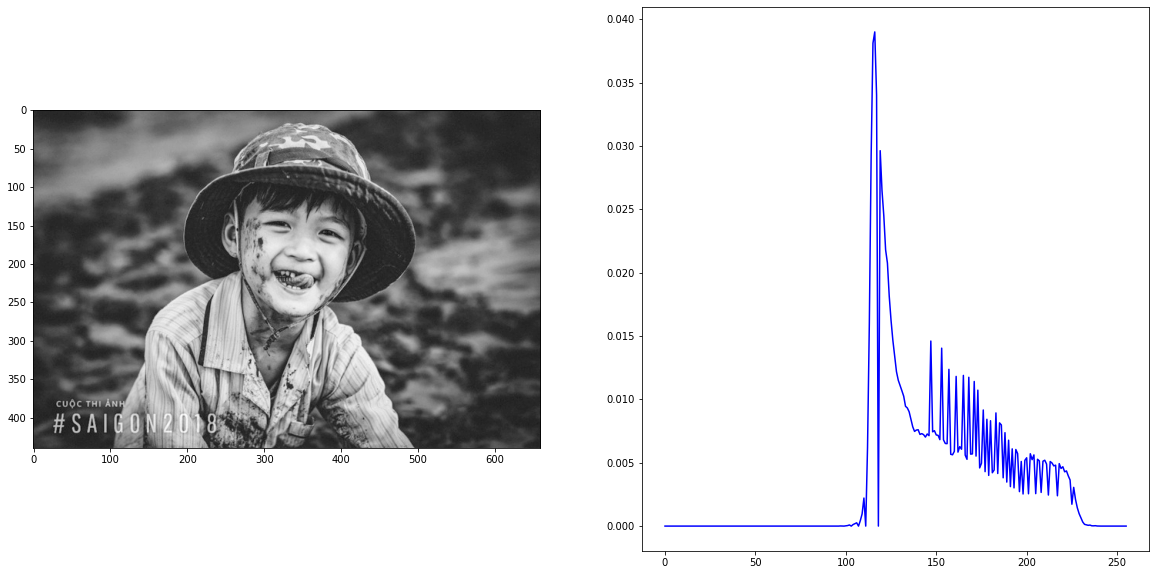

In [19]:
import numpy as np
img_adjusted = adjust_image_gamma_lookuptable(img, gamma=0.45)
plt.figure(figsize=(20,10))
plot_img_and_hist(img_adjusted)

Using numpy.histogram function

In [20]:
h2 = np.histogram(img.ravel(), bins=256, range=[0, 256])
h2

(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            2,     2,     2,     3,     2,     6,    12,    26,    35,
           54,    75,   124,   279,   643,  1809,  4654,  8487, 11074,
        11331,  9884,  8608,  7694,  7115,  6333,  6031,  5272,  4717,
         4261,  3909,  3541,  3344,  3226,  3103,  2978,  2747,  2709,
         2622,  2452,  2276,  2171,  2202,  2209,  2102,  2120,  2097,
         2041,  2112,  2074,  2088,  2155,  2161,  2187,  2089,  2082,
         1982,  2020,  2060,  1978,  1894,  1890,  1853,  1741,  1647,
         1635,  1714,  1701,  1731,  1696,  1822,  1763,  1794,  1661,
         1628,  1531,  1641,  1771,  1650,  1655,  1694,  1622,  1605,
         1600,  1517,  1334,  1441,  1365,  1297,  1248,  1232,  1217,
         1162,  1169,  1247,  1223,  1286,  1306,  1289,  1206,  1230,
      

In [21]:
h2[0].shape

(256,)

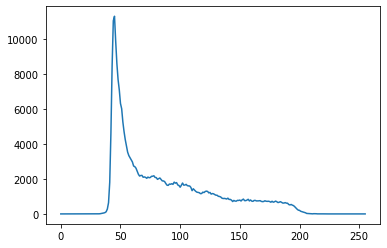

In [22]:
plt.plot(h2[0])

In [23]:
h3 = np.histogram(img_adjusted.ravel(), bins=256, range=[0, 256])

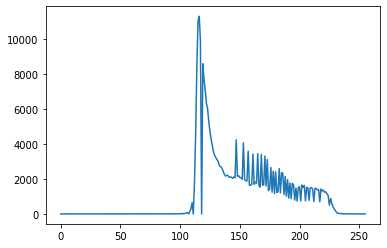

In [24]:
plt.plot(h3[0])

### Histogram Equalization

In [25]:
def hist_equalize(img):
    #1. calculate hist
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    #2. normalize hist
    h, w = img.shape[:2]
    hist = hist/(h*w)
    
    #3. calculate CDF
    cdf = np.cumsum(hist)
    s_k = (255 * cdf-0.5).astype("uint8")
    return s_k

In [26]:
hist_equalize(img)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   2,   6,  13,  23,  33,  42,  49,  56,  62,  68,  73,
        78,  82,  86,  89,  92,  95,  98, 101, 103, 106, 108, 110, 112,
       114, 116, 118, 120, 122, 124, 126, 128, 129, 131, 133, 135, 137,
       139, 141, 142, 144, 146, 148, 149, 151, 153, 154, 156, 157, 159,
       160, 162, 163, 165, 166, 168, 170, 171, 172, 174, 175, 177, 178,
       180, 181, 183, 184, 185, 187, 188, 189, 190, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209,
       209, 210, 211, 212, 213, 214, 215, 215, 216, 217, 218, 218, 219,
       220, 220, 221, 222, 222, 223, 224, 225, 225, 226, 227, 227, 228,
       229, 229, 230, 231, 231, 232, 233, 233, 234, 235, 235, 236, 237,
       237, 238, 239, 239, 240, 240, 241, 242, 242, 243, 243, 24

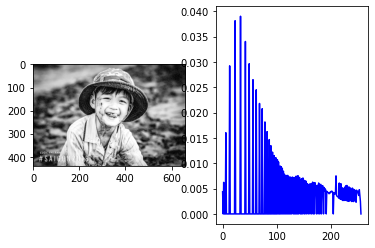

In [27]:
s_k = hist_equalize(img)
equalized_img = cv2.LUT(img, s_k)
plot_img_and_hist(equalized_img)

Using OpenCV function

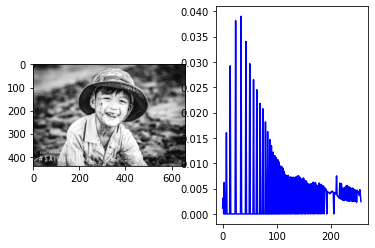

In [28]:
img_equalized = cv2.equalizeHist(img)
plot_img_and_hist(img_equalized)

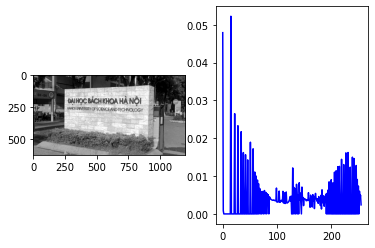

In [30]:
high_exposure_img = cv2.imread('hust.png',0)
he_equalized = cv2.equalizeHist(high_exposure_img)
plot_img_and_hist(he_equalized)